In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#from matplotlib.patches import Ellipse
#from scipy import linalg

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

<h1>AGN GMM clustering in four dimensions</h1>

In [7]:
tmp = pd.read_csv('class_WHAN_BPT.csv')
logNA = tmp["xx_BPT"]
logOB = tmp["yy_BPT"]
logEWH = tmp["yy_WHAN"]
logEWN = tmp["EW_NII_WHAN"]

In [14]:
train = np.c_[logEWH,logNA,logOB,logEWN]

<h2>GMM with 2 clusters</h2>

In [15]:
n_components = 2
gmm2 = GMM(n_components=n_components,covariance_type='full')
y_gmm2 = gmm2.fit_predict(train)

<h2>GMM with 3 clusters</h2>

In [15]:
n_components = 3
gmm3 = GMM(n_components=n_components,covariance_type='full')
y_gmm3 = gmm3.fit_predict(train)

In [16]:
mean = gmm3.means_

<h1>AGN GMM clustering in three dimensions</h1>

In [2]:
tmp = pd.read_csv('class_WHAN_BPT.csv')
logNA = tmp["xx_BPT"]
logOB = tmp["yy_BPT"]
logEW = tmp["yy_WHAN"]

In [3]:
# for clean_AGN_data.csv

#tmp = pd.read_csv('clean_AGN_data.csv')

#logNA = tmp['log.AGN.NII.AGN.H_alpha..10.']
#logOB = tmp['log.AGN.OIII.AGN.H_beta..10.']
#logEW = tmp['log.AGN.EW_H_alpha..10.']

In [3]:
#train = np.c_[np.log10(tmp['EW_H_alpha']),np.log10(rna),np.log10(rob)]
train = np.c_[logEW,logNA,logOB]

<h2>GMM with 2 Clusters</h2>

In [4]:
n_components = 2
gmm2 = GMM(n_components=n_components,covariance_type='full')
y_gmm2 = gmm2.fit_predict(train)
proba = gmm2.predict_proba(train)
mean = gmm2.means_

In [5]:
mean = gmm2.means_

In [ ]:
plot_order = [1,0] # run gmm, decide preferred order
color_order = ["Purples","Greens"]

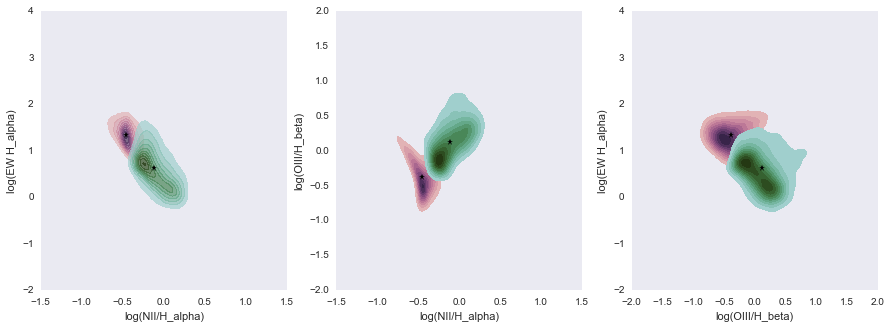

In [6]:
plt.figure(figsize=(15,5))

ax2a = plt.subplot(131)
for i in np.arange(n_components):
    x_plot = logNA[y_gmm2==i]
    y_plot = logEW[y_gmm2==i]
    start = float(i)*3./(n_components)
    cmap = sns.cubehelix_palette(8, start=start, as_cmap=True)
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, alpha=0.7, ax=ax2a)
    plt.plot(mean[i][1], mean[i][0], 'k*')
#plt.scatter(np.log10(rna),np.log10(tmp['EW_H_alpha']),c=y_gmm2,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(NII/H_alpha)')
plt.ylabel('log(EW H_alpha)')
plt.xlim(-1.5,1.5)
plt.ylim(-2.0,4.0)
plt.grid()

ax2b = plt.subplot(132)
for i in np.arange(n_components):
    x_plot = logNA[y_gmm2==i]
    y_plot = logOB[y_gmm2==i]
    start = float(i)*3./(n_components)
    cmap = sns.cubehelix_palette(8, start=start, as_cmap=True)
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, ax=ax2b)
    plt.plot(mean[i][1], mean[i][2], 'k*')
#plt.scatter(np.log10(rna),np.log10(rob),c=y_gmm2,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(NII/H_alpha)')
plt.ylabel('log(OIII/H_beta)')
plt.xlim(-1.5,1.5)
plt.ylim(-2.0,2.0)
plt.grid()

ax2c = plt.subplot(133)
for i in np.arange(n_components):
    x_plot = logOB[y_gmm2==i]
    y_plot = logEW[y_gmm2==i]
    start = float(i)*3./(n_components)
    cmap = sns.cubehelix_palette(8, start=start, as_cmap=True)
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, ax=ax2c)
    plt.plot(mean[i][2], mean[i][0], 'k*')
#plt.scatter(np.log10(rob),np.log10(tmp['EW_H_alpha']),c=y_gmm2,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(OIII/H_beta)')
plt.ylabel('log(EW H_alpha)')
plt.xlim(-2.0,2.0)
plt.ylim(-2.0,4.0)
plt.grid()

<h2>GMM with 3 clusters</h2>

In [4]:
n_components = 3
gmm3 = GMM(n_components=n_components,covariance_type='full')
#y_gmm3 = gmm3.fit_predict(train)
proba = gmm3.predict_proba(train)
mean = gmm3.means_

In [5]:
plot_order = [1,0,2] # run gmm, decide preferred order
color_order = ["BuPu","Oranges","Greens"]

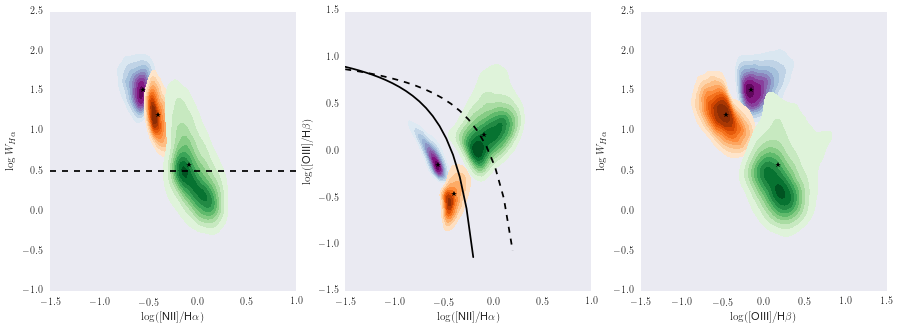

In [7]:
plt.figure(figsize=(15,5))

# WHAN
ax3a = plt.subplot(131)
for j in np.arange(n_components):
    i = plot_order[j]
    select = proba[:,i]>0.8
    #select = y_gmm3==i
    x_plot = logNA[select]
    y_plot = logEW[select]
    cmap = color_order[j]
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, ax=ax3a)
    plt.plot(mean[i][1], mean[i][0], 'k*', ms=6)
#plt.scatter(np.log10(rna),np.log10(tmp['EW_H_alpha']),c=y_gmm3,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel(r'$\log([$NII$]/$H$\alpha)$')
plt.ylabel(r'$\log W_{H\alpha}$')
plt.xlim(-1.5,1.0)
plt.ylim(-1.0,2.5)
# theoretical and empirical curves
ax3a.plot((xleft,xright), (0.5,0.5), 'k--')
plt.grid()

# BPT
ax3b = plt.subplot(132)
for j in np.arange(n_components):
    i = plot_order[j]
    select = proba[:,i]>0.8
    #select = y_gmm3==i
    x_plot = logNA[select]
    y_plot = logOB[select]
    cmap = color_order[j]
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, ax=ax3b)
    plt.plot(mean[i][1], mean[i][2], 'k*', ms=6)
#plt.scatter(np.log10(rna),np.log10(rob),c=y_gmm3,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel(r'$\log([$NII$]/$H$\alpha)$')
plt.ylabel(r'$\log([$OIII$]/$H$\beta)$')
plt.xlim(-1.5,1.0)
plt.ylim(-1.5,1.5)
# theoretical and empirical curves
[xleft, xright] = ax3b.get_xlim()
kauffman_x = np.linspace(xleft, min(-0.2,xright), 20)
kauffman_y = 0.61 / (kauffman_x - 0.05) + 1.3
ax3b.plot(kauffman_x, kauffman_y, 'k-')
kewley_x = np.linspace(xleft, min(0.2,xright), 20)
kewley_y = 0.61 / (kewley_x - 0.47) + 1.19
ax3b.plot(kewley_x, kewley_y, 'k--')
plt.grid()

# Third projection
ax3c = plt.subplot(133)
for j in np.arange(n_components):
    i = plot_order[j]
    select = proba[:,i]>0.8
    #select = y_gmm3==i
    x_plot = logOB[select]
    y_plot = logEW[select]
    cmap = color_order[j]
    sns.kdeplot(x_plot, y_plot, cmap=cmap, shade=True, shade_lowest=False, ax=ax3c)
    plt.plot(mean[i][2], mean[i][0], 'k*', ms=6)
#plt.scatter(np.log10(rob),np.log10(tmp['EW_H_alpha']),c=y_gmm3,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel(r'$\log([$OIII$]/$H$\beta)$')
plt.ylabel(r'$\log W_{H\alpha}$')
plt.xlim(-1.5,1.5)
plt.ylim(-1.0,2.5)
plt.grid()

<h2>GMM with 4 clusters</h2>

In [ ]:
gmm4 = GMM(n_components=4,covariance_type='full')
y_gmm4 = gmm4.fit_predict(train)

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(np.log10(rna),np.log10(tmp['EW_H_alpha']),c=y_gmm4,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(NII/H_alpha)')
plt.ylabel('log(EW H_alpha)')
plt.xlim(-1.5,1.5)
plt.ylim(-2.0,4.0)
plt.grid()

plt.subplot(132)
plt.scatter(np.log10(rna),np.log10(rob),c=y_gmm4,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(NII/H_alpha)')
plt.ylabel('log(OIII/H_beta)')
plt.xlim(-1.5,1.5)
plt.ylim(-2.0,2.0)
plt.grid()

plt.subplot(133)
plt.scatter(np.log10(rob),np.log10(tmp['EW_H_alpha']),c=y_gmm4,alpha=0.3,edgecolors='None',cmap='viridis')
plt.xlabel('log(OIII/H_beta)')
plt.ylabel('log(EW H_alpha)')
plt.xlim(-2.0,2.0)
plt.ylim(-2.0,4.0)
plt.grid()